## Day agenda
- what us over fitting
- what is under fitting
- How to handle that over fitting and under fitting problems in ML
- Bias,Variance
- Calculations behind the L1 & L2 Regularisation's

##  Model fitting
- Over fitting
    - model performance is low in training - low bias
    - model performance is low in testing - low variance
- under fitting
    - model performance is high in training - high bias
    - model performance is low in testing - low variance
- balanced fitting-find the generalised model
    - model performance is high in training-high bias
    - model performance is high in testing- high variance


## observe the model performance
## improve model performance by L1,&L2

## 1.Load the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/madevi431/py/master/ML/16_regularization/Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## 2. Data Preprocessing


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
## select the features which have importance to find our target i,e,price
cols_=['Suburb','Rooms','Type','Method','SellerG','Distance',
       'Bedroom2','Bathroom','Car','Landsize', 'BuildingArea',
      'CouncilArea', 'Lattitude','Regionname', 'Propertycount','Price']

In [10]:
df=df[cols_]
df.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Regionname,Propertycount,Price
0,Abbotsford,2,h,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,-37.8014,Northern Metropolitan,4019.0,NaN
1,Abbotsford,2,h,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,-37.7996,Northern Metropolitan,4019.0,1480000.0
2,Abbotsford,2,h,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.8079,Northern Metropolitan,4019.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,-37.8114,Northern Metropolitan,4019.0,NaN
4,Abbotsford,3,h,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.8093,Northern Metropolitan,4019.0,1465000.0


In [11]:
df.shape

(34857, 16)

In [12]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Lattitude         7976
Regionname           3
Propertycount        3
Price             7610
dtype: int64

In [17]:
df=df.drop("Lattitude",axis=1)


In [19]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
Price             7610
dtype: int64

In [21]:
cols_zero=['Propertycount','Distance','Bedroom2','Bathroom','Car']
df[cols_zero]=df[cols_zero].fillna(0)


In [22]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Distance             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        0
Price             7610
dtype: int64

In [23]:
df['Landsize']=df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea']=df["BuildingArea"].fillna(df.BuildingArea.mean())

In [24]:
df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       0
Price            7610
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
Price            0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27244 non-null  object 
 1   Rooms          27244 non-null  int64  
 2   Type           27244 non-null  object 
 3   Method         27244 non-null  object 
 4   SellerG        27244 non-null  object 
 5   Distance       27244 non-null  float64
 6   Bedroom2       27244 non-null  float64
 7   Bathroom       27244 non-null  float64
 8   Car            27244 non-null  float64
 9   Landsize       27244 non-null  float64
 10  BuildingArea   27244 non-null  float64
 11  CouncilArea    27244 non-null  object 
 12  Regionname     27244 non-null  object 
 13  Propertycount  27244 non-null  float64
 14  Price          27244 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 3.3+ MB


## Let's convert object data type or catagorical type into numerics
1. label encoder
2. get_dummies
    - assign a new integer/dummey value based on column data
3. one-hot encoder


In [28]:
df=pd.get_dummies(df,drop_first=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Columns: 745 entries, Rooms to Regionname_Western Victoria
dtypes: float64(8), int64(1), uint8(736)
memory usage: 21.2 MB


In [30]:
df.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Price,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,1480000.0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,1035000.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,1465000.0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,850000.0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,1600000.0,0,...,0,1,0,0,1,0,0,0,0,0


## 3. Separate or define input and output

In [31]:
x=df.drop("Price",axis=1)
y=df['Price']

In [35]:
x.columns

Index(['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Propertycount', 'Suburb_Aberfeldie',
       'Suburb_Airport West',
       ...
       'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object', length=744)

In [37]:
y

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 27244, dtype: float64

In [49]:
## separate the data for training and testing
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2)

In [50]:
x_test.shape

(8174, 744)

In [51]:
x_train.shape

(19070, 744)

In [52]:
y_train.shape

(19070,)

In [53]:
y_test.shape

(8174,)

## 4. Train the model

In [54]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [55]:
l.fit(x_train,y_train)

LinearRegression()

In [56]:
l.score(x_train,y_train)*100

68.27792395792723

In [57]:
l.score(x_test,y_test)*100

13.853683161615448

##  The model is overfitted 
- to overcome the l1,l2 can be used

In [65]:
from sklearn.linear_model import Lasso
la=Lasso(alpha=70)
la.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167003842526655.0, tolerance: 796258688308.2224
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=70)

In [66]:
la.score(x_train,y_train)*100

67.47760108046225

In [67]:
la.score(x_test,y_test)*100

67.30494959505434

In [73]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=50)

In [74]:
r.fit(x_train,y_train)

Ridge(alpha=50)

In [75]:
r.score(x_train,y_train)*100

66.22376739684329

In [76]:
r.score(x_test,y_test)*100

66.70848945194959

In [77]:
l.coef_

array([ 2.64001655e+05, -4.64732744e+04, -8.22349031e+04,  1.17151153e+05,
        4.29703140e+04,  2.35173742e+00,  4.70024530e+02,  4.92118905e+00,
        2.61342069e+05, -4.61008827e+04, -1.32312259e+05,  2.15453995e+05,
        1.20133839e+05,  2.72683980e+05,  1.74702166e+05, -8.00201053e+04,
       -1.50967673e+05, -4.94461444e+04,  1.17711126e+05, -1.28880253e+05,
       -3.49349656e+04, -8.54261329e+03,  6.19157896e+04, -2.57258028e+05,
       -1.10868116e+05, -2.42391674e+05,  1.79856957e+05, -1.22395100e+05,
        2.04625284e+05,  3.78258911e+04,  1.46681364e+05,  2.32198628e+03,
        7.35395730e+04, -5.29198409e+04,  1.90482393e+05, -3.20451670e+05,
        7.49515014e+04, -2.83019804e+04,  2.69103300e+04,  2.78824270e+05,
        1.51386730e+05, -1.06324212e+05, -8.45087700e+04,  2.96568248e+05,
        1.50644588e+05,  4.14438546e-08,  1.75999576e+05, -1.20057166e+05,
       -9.64544651e+03,  3.68377378e+05, -1.35478625e+05, -6.38092126e+04,
        3.53493140e+04,  

In [78]:
la.coef_

array([ 2.72140472e+05, -2.87681250e+04, -8.53952474e+04,  1.24312283e+05,
        4.13419905e+04,  2.56573736e+00,  2.92132480e+01,  2.65680559e+00,
        2.14581446e+05, -1.15763864e+05, -0.00000000e+00,  3.58433614e+05,
        1.42899144e+05,  3.23370231e+05,  1.33683095e+05, -7.16600738e+04,
       -1.24774887e+05, -0.00000000e+00,  1.49270783e+04, -7.56456224e+04,
       -3.95882406e+04,  0.00000000e+00,  3.37354944e+02, -1.10763963e+05,
       -0.00000000e+00, -2.63114204e+05,  0.00000000e+00, -0.00000000e+00,
        2.11007735e+05,  4.50690203e+04,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.55870509e+05, -1.73887496e+05,
        2.30395325e+04, -8.98852537e+04,  8.28708835e+04,  2.08151185e+05,
        1.80902176e+05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.43851681e+05, -1.26802937e+05,
       -0.00000000e+00,  4.81560987e+05, -1.01744414e+04,  1.65037550e+04,
        0.00000000e+00,  

In [79]:
r.coef_

array([ 2.74565399e+05, -3.08679934e+04, -8.54802356e+04,  1.30784473e+05,
        3.79897031e+04,  3.01027203e+00,  3.48784768e+01,  1.43900376e+00,
        1.28807037e+05, -6.43936116e+04, -2.20191147e+04,  1.41225935e+05,
        6.01541283e+04,  1.36604921e+05,  6.82450737e+04, -4.48758586e+04,
       -1.18261081e+05, -1.40375061e+04,  9.47702189e+04, -5.29144382e+04,
       -4.41704919e+04, -4.98005912e+04,  2.40852122e+04, -3.83936672e+04,
       -1.58353300e+04, -1.68201754e+05,  8.08493825e+03, -6.27880702e+04,
        1.48801899e+05,  3.01077775e+04,  2.59806529e+04, -1.38083800e+04,
        1.17008911e+04,  9.42462899e+02,  7.84154905e+04, -6.16676997e+04,
        3.86961098e+04, -5.72485218e+04,  4.67434700e+04,  6.78005371e+04,
        7.05287853e+04, -3.93760752e+04, -2.74948996e+04,  2.49850015e+04,
        2.99162838e+04,  0.00000000e+00,  1.14984883e+05, -7.42920919e+04,
       -1.36014255e+04,  3.69878814e+05, -4.72146099e+04, -8.03342124e+03,
        2.80914008e+03,  

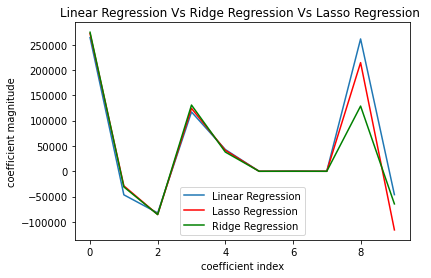

In [86]:
plt.plot(l.coef_[:10],label="Linear Regression")
plt.plot(la.coef_[:10],c='r',label="Lasso Regression")
plt.plot(r.coef_[:10],c='g',label="Ridge Regression")
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.title("Linear Regression Vs Ridge Regression Vs Lasso Regression ")
plt.legend()
plt.show()